In [1]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Desktop")

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
ds=pd.read_csv("MoneyMkt LIBOR EUR 3-MONTH DAILY.csv")

In [4]:
ds.tail()

,DATE,CLOSE
1995,11-May-20,-0.22457
1996,12-May-20,-0.23071
1997,13-May-20,-0.24329
1998,14-May-20,-0.25800
1999,15-May-20,-0.26300


In [5]:
ds['DATE']=pd.to_datetime(ds['DATE'])

In [6]:
ds.head()

,DATE,CLOSE
0,2012-06-20,0.56686
1,2012-06-21,0.56479
2,2012-06-22,0.55907
3,2012-06-25,0.55679
4,2012-06-26,0.55621


In [7]:
ds.set_index('DATE', inplace=True)

In [8]:
ds.head()

,CLOSE
DATE,
2012-06-20,0.56686
2012-06-21,0.56479
2012-06-22,0.55907
2012-06-25,0.55679
2012-06-26,0.55621


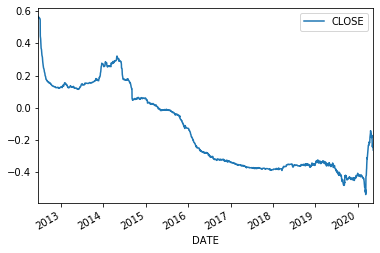

In [9]:
ds.plot()

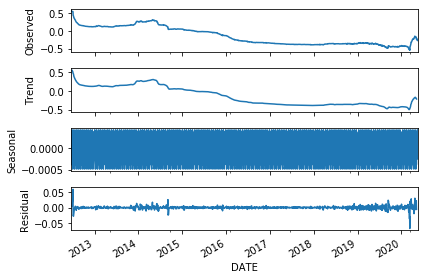

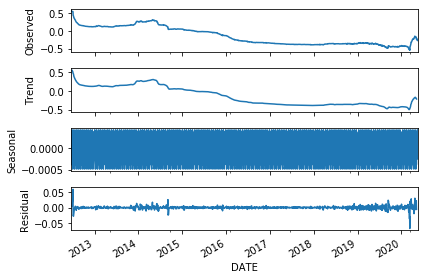

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(ds['CLOSE'], freq=12)  
decomp.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller(ds['CLOSE'])

(-2.861985468184029,
 0.04995051956733657,
 8,
 1991,
 {'1%': -3.4336386745240652,
  '5%': -2.8629927557359443,
  '10%': -2.5675433856598793},
 -15560.021342070435)

In [12]:
def adf_chec(time_series):
    result=adfuller(time_series)
    print("Augmented Dickey fuller test")
    labels=['ADF Test Statistic', 'P-value', '#Lags', 'No of obs.']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, timeseries is stationery')
    else: 
        print('Weak evidence against null hypothesis, timeseries is non-stationery')

In [13]:
adf_chec(ds['CLOSE'])

Augmented Dickey fuller test
ADF Test Statistic:-2.861985468184029
P-value:0.04995051956733657
#Lags:8
No of obs.:1991
Strong evidence against null hypothesis, timeseries is stationery


In [19]:
#p=0;d=1;q=0

In [14]:
ds['Seasonal Difference']=ds['CLOSE']-ds['CLOSE'].shift(12)  

In [15]:
ds.head()

,CLOSE,Seasonal Difference
DATE,,
2012-06-20,0.56686,NaN
2012-06-21,0.56479,NaN
2012-06-22,0.55907,NaN
2012-06-25,0.55679,NaN
2012-06-26,0.55621,NaN


In [16]:
adf_chec(ds['Seasonal Difference'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-7.449626324327166
P-value:5.715988282575059e-11
#Lags:25
No of obs.:1962
Strong evidence against null hypothesis, timeseries is stationery


In [23]:
#d=1, D=0

In [17]:
plot_acf(ds['Seasonal Difference'].dropna(), lags=12) #Q=6

NameError: name 'plot_acf' is not defined

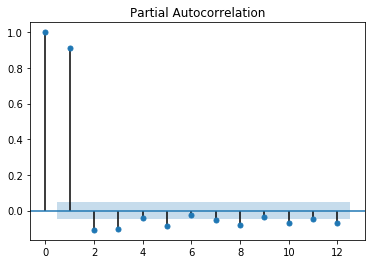

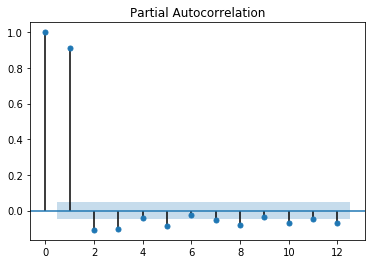

In [27]:
plot_pacf(ds['Seasonal Difference'].dropna(), lags=12) #P=1

In [28]:
#Finally,       AR  I  MA
#      TREND :  1   1  1

#SEASONALITY :  1  0   6


In [19]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ds['CLOSE'],order=(1,1,1), seasonal_order=(2,1,2,12))
results=model.fit()


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


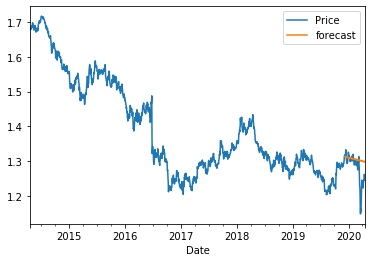

In [30]:
ds['forecast']=results.predict(start=1700, end=2000, dynamic=True)
ds[['P','forecast']].plot()

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[ds.index[-1]+ DateOffset(days=x) for x in range(0,365)]

In [32]:
future_dates_df_1=pd.DataFrame(index=future_dates[1:], columns=ds.columns)
future_df_1=pd.concat([ds,future_dates_df_1])

In [33]:
future_dates_df_1

,Price,Price First Diff,Seasonal Difference,forecast
2020-04-18,NaN,NaN,NaN,NaN
2020-04-19,NaN,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN,NaN
2020-04-22,NaN,NaN,NaN,NaN
2020-04-23,NaN,NaN,NaN,NaN
2020-04-24,NaN,NaN,NaN,NaN
2020-04-25,NaN,NaN,NaN,NaN
2020-04-26,NaN,NaN,NaN,NaN
2020-04-27,NaN,NaN,NaN,NaN


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


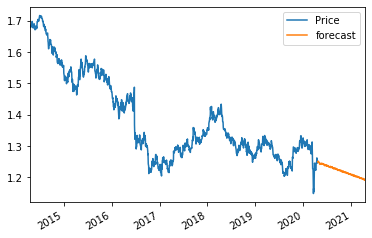

In [34]:
future_df_1['forecast']=results.predict(start=1567, end=1932, dynamic=True)
future_df_1[['Price','forecast']].plot()

In [35]:
future_df_1.tail(-1565)

,Price,Price First Diff,Seasonal Difference,forecast
2020-04-18,NaN,NaN,NaN,NaN
2020-04-19,NaN,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN,NaN
2020-04-22,NaN,NaN,NaN,1.249262
2020-04-23,NaN,NaN,NaN,1.250302
2020-04-24,NaN,NaN,NaN,1.251291
2020-04-25,NaN,NaN,NaN,NaN
2020-04-26,NaN,NaN,NaN,NaN
2020-04-27,NaN,NaN,NaN,1.250392


In [36]:
future_df_2=future_df_1.drop(['Price','Price First Diff','Seasonal Difference'],axis=1)

In [37]:
future_df_2.tail(-1565)

,forecast
2020-04-18,NaN
2020-04-19,NaN
2020-04-20,NaN
2020-04-21,NaN
2020-04-22,1.249262
2020-04-23,1.250302
2020-04-24,1.251291
2020-04-25,NaN
2020-04-26,NaN
2020-04-27,1.250392


In [38]:
future_df_2=future_df_2.tail(-1565)